# Hi!

I'm **Rizky Anshari**

Notebook ini adalah bentuk evaluasi saya pada pembelajaran machine learning untuk supervised learning pada model *Logistic Regression* dan *Support Vector Machine*

### The Data
'bigquery-public-data.ml_datasets.census_adult_income'

### The Objective
Memprediksi income bracket atau golongan pendapatan dari dataset cencus adult income pada Big Query, menggunakan model supervised logistic Regression dan Support Vectore Machine

In [4]:
#### Query
'''
SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket

from `bigquery-public-data.ml_datasets.census_adult_income`

WHERE workclass <> ' ?' and hours_per_week < 100

limit 1995;
'''

"\nSELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket\n\nfrom `bigquery-public-data.ml_datasets.census_adult_income`\n\nWHERE workclass <> ' ?' and hours_per_week < 100\n\nlimit 1995;\n"

![Image](https://img.freepik.com/vektoren-kostenlos/die-mitarbeiter-der-finanzabteilung-berechnen-die-kosten-des-unternehmens_1150-41782.jpg?w=2000)

# Libraries

In [5]:
# library diimport tidak diurutkan, karena berdasarkan urutan penggunaan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import phik
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix 
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.svm import SVC

# Data Loading

In [6]:
# load dataset dengan library pandas
fun = pd.read_csv('h8dsft_P1G2_rizky_anshari.csv')

interval columns not set, guessing: ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


<AxesSubplot:>

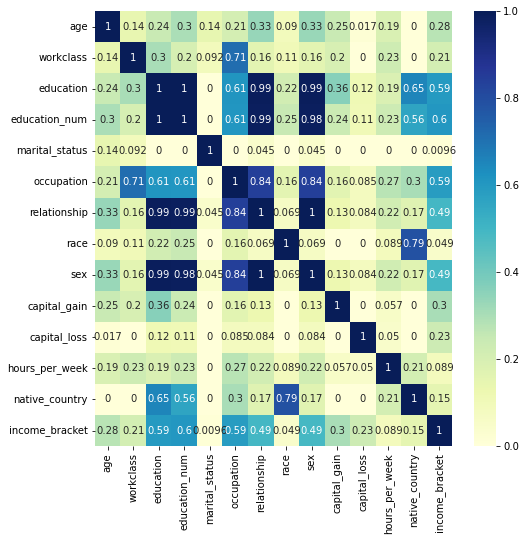

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(fun.phik_matrix(),
            vmin=0,
            vmax=1,
            annot=True,
            cmap='YlGnBu')

In [8]:
# shape ukuran dataframe
fun.shape

(1995, 14)

In [9]:
# menampilkan 5 baris teratas dataset
fun.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K
2,45,Private,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,United-States,>50K
3,31,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4,55,Private,9th,5,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,23,United-States,<=50K


In [10]:
# menampilkan 5 baris terakhir dataset
fun.tail()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
1990,34,Private,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
1991,30,Private,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1992,39,Private,11th,7,Married-civ-spouse,Other-service,Husband,Black,Male,2635,0,37,United-States,<=50K
1993,31,Private,11th,7,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1994,43,Private,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K


In [11]:
# menampilkan info dari dataset
fun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1995 non-null   int64 
 1   workclass       1995 non-null   object
 2   education       1995 non-null   object
 3   education_num   1995 non-null   int64 
 4   marital_status  1995 non-null   object
 5   occupation      1995 non-null   object
 6   relationship    1995 non-null   object
 7   race            1995 non-null   object
 8   sex             1995 non-null   object
 9   capital_gain    1995 non-null   int64 
 10  capital_loss    1995 non-null   int64 
 11  hours_per_week  1995 non-null   int64 
 12  native_country  1995 non-null   object
 13  income_bracket  1995 non-null   object
dtypes: int64(5), object(9)
memory usage: 218.3+ KB


data memiliki 14 coloum, jumlah barisnya 1995, dan memiliki type data int dan object. dari info tidak terlihat ada missing value

In [12]:
# melihat apakah ada massing value pada data
fun.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [13]:
# menampilkan descriptive statistik
fun.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,41.497744,9.185965,1432.175940,101.097744,38.842607
std,11.947451,3.002173,8454.008852,429.724037,11.293179
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,32.000000,6.000000,0.000000,0.000000,36.000000
50%,40.000000,9.000000,0.000000,0.000000,40.000000
75%,50.000000,12.000000,0.000000,0.000000,40.000000
max,90.000000,16.000000,99999.000000,2415.000000,99.000000


data memiliki anomali pada coloum *capital_gail* dan *capital_loss* ditinjau dari nilai min, half, max nya.

#### Data Cleaning

In [14]:
# checking setiap value didalam coloum
print(fun['workclass'].unique())
print(f'------------------------------------------')
print(fun['education'].unique())
print(f'------------------------------------------')
print(fun['marital_status'].unique())
print(f'------------------------------------------')
print(fun['occupation'].unique())
print(fun['occupation'].nunique())
print(f'------------------------------------------')
print(fun['relationship'].unique())
print(f'------------------------------------------')
print(fun['race'].unique())
print(f'------------------------------------------')
print(fun['sex'].unique())
print(f'------------------------------------------')
print(fun['native_country'].unique())
print(fun['native_country'].nunique())
print(f'------------------------------------------')
print(fun['income_bracket'].unique())
print(f'------------------------------------------')
print(fun['age'].unique())
print(f'------------------------------------------')
print(fun['education_num'].unique())
print(f'------------------------------------------')
print(fun['capital_gain'].unique())
print(f'------------------------------------------')
print(fun['capital_loss'].unique())
print(f'------------------------------------------')
print(fun['hours_per_week'].unique())


[' Private' ' Self-emp-inc' ' Local-gov' ' Self-emp-not-inc'
 ' Federal-gov' ' State-gov' ' Without-pay' ' Never-worked']
------------------------------------------
[' 9th' ' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th'
 ' HS-grad' ' Masters' ' Assoc-voc' ' Bachelors' ' Doctorate' ' Preschool'
 ' Assoc-acdm' ' Prof-school' ' Some-college']
------------------------------------------
[' Married-civ-spouse' ' Married-AF-spouse']
------------------------------------------
[' Other-service' ' Exec-managerial' ' Machine-op-inspct' ' Tech-support'
 ' Adm-clerical' ' Farming-fishing' ' Priv-house-serv' ' Sales'
 ' Protective-serv' ' Transport-moving' ' Handlers-cleaners'
 ' Craft-repair' ' Prof-specialty' ' ?']
14
------------------------------------------
[' Wife' ' Husband']
------------------------------------------
[' Black' ' Asian-Pac-Islander' ' White' ' Amer-Indian-Eskimo' ' Other']
------------------------------------------
[' Female' ' Male']
-------------------------------

terdapat nilai kategory yang valuenya '?' pada coloum *native_country* dan *occupation*. karena data ini dalam category dan tidak berpengaruh jadi valuenya tetap saja.

In [15]:
# checking duplicate
fun.duplicated().sum()

62

ada 62 data dulicate, row ini akan kita drop

In [16]:
# drop duplicate row
fun.drop_duplicates(inplace=True)
fun.duplicated().sum()

0

# Exploratory Data Analysis

[Text(0, 0, '1182'), Text(0, 0, '751')]

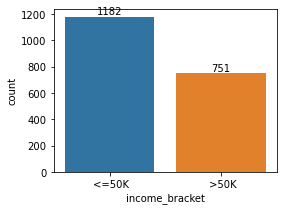

In [17]:
# library matplotlib
# library seaborn
# menampilkan persentase data target

plt.figure(figsize=(4,3))
c = sns.countplot(data=fun, x='income_bracket')
c.bar_label(c.containers[0], label_type='edge')

income_bracket <= 50 ada 1182 sedangakan income_bracket >50 ada 751.

## Data Preprocessing

#### Data inference


In [18]:
# Pemisahan data inference

fun_inf = fun.sample(5, random_state=41)
fun_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
1857,29,Self-emp-not-inc,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,>50K
737,41,Private,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,>50K
1561,28,Private,9th,5,Married-civ-spouse,Sales,Husband,White,Male,4508,0,40,United-States,<=50K
1274,42,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,El-Salvador,>50K
1278,44,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,<=50K


In [19]:
# memisahkan data inference dari dataset

fun_train_test = fun.drop(fun_inf.index)
fun_train_test.head(2)


,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,Private,9th,5,Married-civ-spouse,Other-service,Wife,Black,Female,3411,0,34,United-States,<=50K
1,72,Private,9th,5,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,United-States,>50K


In [20]:
# reset index untuk data train-test dan data inference

fun_train_test.reset_index(drop=True, inplace=True)
fun_inf.reset_index(drop=True, inplace=True)

#### Train Data, Test Data

In [21]:
# import sklearn
# memisahkan data train dengan test

train, test = train_test_split(fun_train_test, test_size=0.2, random_state=20)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (1542, 14)
Test size:  (386, 14)


[Text(0, 0, '941'), Text(0, 0, '601')]

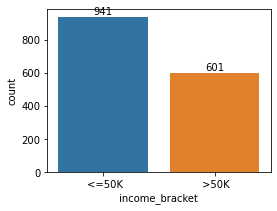

In [22]:
# menampilkan persentase data target pada data train
plt.figure(figsize=(4,3))
c = sns.countplot(data=train, x='income_bracket')
c.bar_label(c.containers[0], label_type='edge')

[Text(0, 0, '239'), Text(0, 0, '147')]

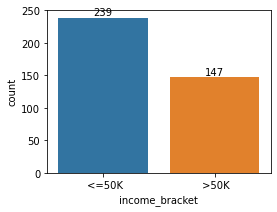

In [23]:
# menampilkan persentase data target pada data test
plt.figure(figsize=(4,3))
c = sns.countplot(data=test, x='income_bracket')
c.bar_label(c.containers[0], label_type='edge')

In [24]:
# memisahkan kolom income_bracket
ib_ib = train['income_bracket']

# memisahkan kolom type number
df_num = train[['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week']]

# memisahkan kolom type category
df_cat = train[['income_bracket', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']]

- karena kolom terget (ib) bertype category maka dilakukan encode untuk disamakan type datanya

In [25]:
le = preprocessing.LabelEncoder() # encoded coloum income_bracket (ib)
le.fit(ib_ib) #fit
ib_le = le.transform(ib_ib) #transform
ib_df = pd.DataFrame(ib_le) # memsasukan hasil transform ke format dataaframe
ib_concc = pd.concat([ib_df, df_num],axis=1) # menggabungkan coloum number dan ib yang telah di encode


- korelasi coloum ib dengan data numerik

In [26]:
ib_conc = ib_concc.rename(columns = {0: "income_bracket"}) # mengganti nama kolom 0  menjadi ib kembali
num_corr = pd.get_dummies(ib_conc).corr() # get dummies dataframe
num_corr.style.background_gradient() # tampilkan korelasi
num_corr.style.background_gradient(cmap='coolwarm') # warna

,income_bracket,age,education_num,capital_gain,capital_loss,hours_per_week
income_bracket,1.000000,0.012417,0.025090,-0.016977,-0.015231,0.041118
age,0.012417,1.000000,-0.177836,0.065341,-0.008233,-0.075234
education_num,0.025090,-0.177836,1.000000,0.115008,0.125499,-0.055318
capital_gain,-0.016977,0.065341,0.115008,1.000000,-0.042675,-0.016240
capital_loss,-0.015231,-0.008233,0.125499,-0.042675,1.000000,-0.001743
hours_per_week,0.041118,-0.075234,-0.055318,-0.016240,-0.001743,1.000000


kolom numerik yang memiliki korelasi dengan *income bracket* : *education_num*, *capital_gain*, *capital_loss*

- korelasi kolom ib dengan data category

In [27]:
cat_corr = pd.get_dummies(df_cat).corr()
cat_corr.style.background_gradient()
cat_corr.style.background_gradient(cmap='coolwarm')

kolom category yang memiliki korelasi dengan *income bracket* : *work_class*, *education*, *occupation*, *relationship*, *sex*

In [28]:
# Melihat value coloum native_country
df_cat.native_country.value_counts()

 United-States                 1341
 Mexico                          40
 ?                               26
 Philippines                     15
 Puerto-Rico                     10
 Canada                           9
 South                            7
 Dominican-Republic               6
 Cuba                             5
 England                          5
 Germany                          5
 Portugal                         5
 Guatemala                        5
 Italy                            5
 El-Salvador                      4
 Trinadad&Tobago                  4
 Poland                           3
 Japan                            3
 Haiti                            3
 Hong                             3
 Taiwan                           3
 India                            3
 Iran                             3
 Jamaica                          3
 Laos                             3
 Vietnam                          3
 Peru                             2
 Outlying-US(Guam-USVI-etc) 

coloum native_country di drop, korelasi sangat kecil dari data

#### Feature Selection

In [29]:
# Menghapus fitur yang tidak digunakan untuk pembuatan model

train.drop(columns=['age', 'hours_per_week', 'marital_status', 'race', 'native_country'], inplace=True)
test.drop(columns=['age', 'hours_per_week', 'marital_status', 'race', 'native_country'], inplace=True)
train

,workclass,education,education_num,occupation,relationship,sex,capital_gain,capital_loss,income_bracket
1200,Local-gov,Some-college,10,Adm-clerical,Wife,Female,0,0,<=50K
984,Private,Bachelors,13,Adm-clerical,Wife,Female,3464,0,<=50K
251,Private,HS-grad,9,Sales,Wife,Female,0,0,<=50K
581,Private,Masters,14,Prof-specialty,Wife,Female,0,1902,>50K
836,Private,Bachelors,13,Exec-managerial,Wife,Female,0,0,>50K
...,...,...,...,...,...,...,...,...,...
924,Private,Bachelors,13,Adm-clerical,Wife,Female,0,0,>50K
1247,Private,Some-college,10,Adm-clerical,Wife,Female,0,0,<=50K
271,Local-gov,HS-grad,9,Adm-clerical,Wife,Female,0,0,<=50K
474,Private,HS-grad,9,Sales,Wife,Female,0,0,<=50K


#### Checking Outlier Handling

In [30]:
# membuat fungsi utk membuat histogram dan boxplot utk melihat distribusi data 

def diagnostic_plots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

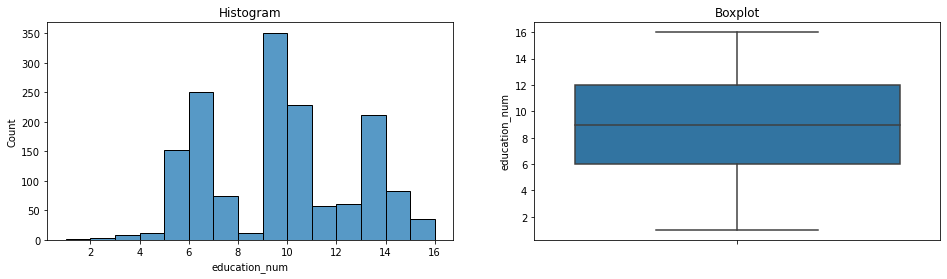


Nilai Skewness:  0.08956582424834612


In [31]:
# melihat distribusi data dan outliers dari feature education_num

diagnostic_plots(train, 'education_num')
print('\nNilai Skewness: ', train['education_num'].skew())

Pada fitur education_num nilai skewnya 0.1 normal, dan tidak ada outlier

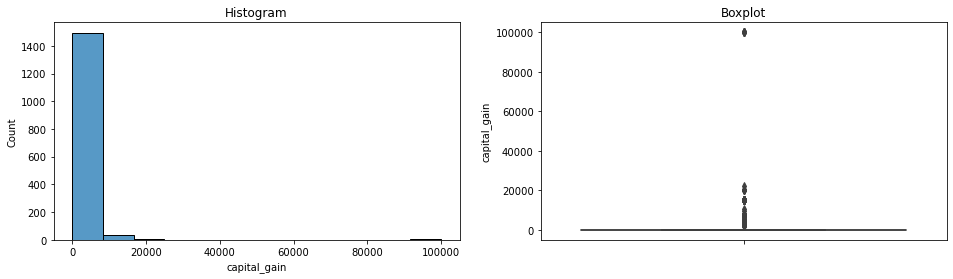


Nilai Skewness:  10.771748365840706


In [32]:
# melihat distribusi data dan outliers dari feature capita-_gain

diagnostic_plots(train, 'capital_gain')
print('\nNilai Skewness: ', train['capital_gain'].skew())

Pada fitur capital_gain nilai skewnya extrem 10.1 , dan terdapat outlier

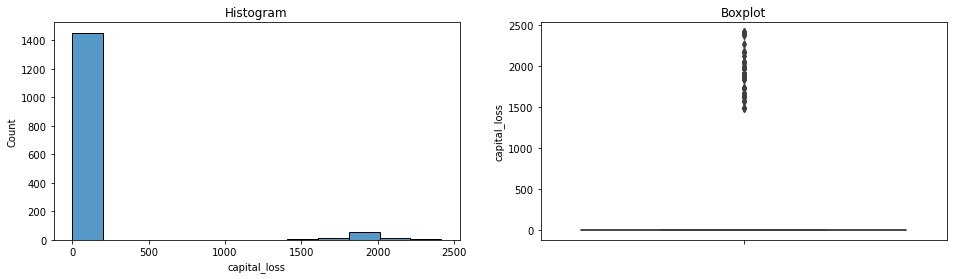


Nilai Skewness:  3.871905005327267


In [33]:
# melihat distribusi data dan outliers dari feature capital_loss

diagnostic_plots(train, 'capital_loss')
print('\nNilai Skewness: ', train['capital_loss'].skew())

Pada fitur capital_gain nilai skewnya 3.9 , dan terdapat outlier

In [34]:
# membuat fungsi untuk mencari batas atas dan bawah untuk deteksi outlier

def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return lower_bound, upper_bound

In [35]:
# mencari outlier untuk distance

lower_bound, upper_bound = find_skew_bound(train, 'capital_gain', 1.5)
lower_bound, upper_bound

print('Batas bawah capital gain:',lower_bound)
print('Batas atas capital gain:',upper_bound)
print('Jumlah outlier pada capital gain = {}'.format(len(train[train['capital_gain'] > upper_bound])))
print('Persentase outlier pada capital gain = {:.2%}'.format(len(train[train['capital_gain'] > upper_bound]) / len(train)))

Batas bawah capital gain: 0.0
Batas atas capital gain: 0.0
Jumlah outlier pada capital gain = 172
Persentase outlier pada capital gain = 11.15%


In [36]:
# mencari outlier untuk distance

lower_bound, upper_bound = find_skew_bound(train, 'capital_loss', 1.5)
lower_bound, upper_bound

print('Batas bawah capital loss:',lower_bound)
print('Batas atas capital loss:',upper_bound)
print('Jumlah outlier pada capital loss = {}'.format(len(train[train['capital_loss'] > upper_bound])))
print('Persentase outlier pada capital loss = {:.2%}'.format(len(train[train['capital_loss'] > upper_bound]) / len(train)))

Batas bawah capital loss: 0.0
Batas atas capital loss: 0.0
Jumlah outlier pada capital loss = 89
Persentase outlier pada capital loss = 5.77%


pada data, outlier terdapat pada feature capital gain dan capital loss, setelah kita lihat lebih jauh batas atas dan bawahnya ada pada titik yang sama. dengan pertimbangan ini saya tidak menghandle outlier. karena akan menghilangkan variance datanya dan jika suatu kolom nilainya sama semua, maka feature tersebut tidak lagi mempunyai signifikasi.

#### Memisahkan Feature and Target

In [37]:
# memisahkan feature dengan target pada data train dan test

X_train = train.drop(columns='income_bracket')
y_train = train['income_bracket']

X_test = test.drop(columns='income_bracket')
y_test = test['income_bracket']

#### Memisahkan Numerical Columns and Categorical Columns

In [38]:
# import numpy
# memisahkan fitur numerik dengan fitur kategori

num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('fitur numerikal:', num_columns)
print('fitur kategorikal:', cat_columns)

fitur numerikal: ['education_num', 'capital_gain', 'capital_loss']
fitur kategorikal: ['workclass', 'education', 'occupation', 'relationship', 'sex']


In [39]:
# memisahkan data train dan test berdasarkan tipe Fitur

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

### Feature Scaling

In [40]:
X_train_num

,education_num,capital_gain,capital_loss
1200,10,0,0
984,13,3464,0
251,9,0,0
581,14,0,1902
836,13,0,0
...,...,...,...
924,13,0,0
1247,10,0,0
271,9,0,0
474,9,0,0


metode scaling yang digunakan adalah minmaxscaller karena fitur data tidak sepenuhnya normal distribusi dan untuk menekan outlier.

In [41]:
# import standarscaler
# Scaling menggunakan StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 0.26198688, -0.17342611, -0.24606861],
       [ 1.26525783,  0.25517456, -0.24606861],
       [-0.07243677, -0.17342611, -0.24606861],
       ...,
       [-0.07243677, -0.17342611, -0.24606861],
       [-0.07243677, -0.17342611, -0.24606861],
       [ 0.26198688, -0.17342611, -0.24606861]])

#### Feature Encoding

In [42]:
X_train_cat

,workclass,education,occupation,relationship,sex
1200,Local-gov,Some-college,Adm-clerical,Wife,Female
984,Private,Bachelors,Adm-clerical,Wife,Female
251,Private,HS-grad,Sales,Wife,Female
581,Private,Masters,Prof-specialty,Wife,Female
836,Private,Bachelors,Exec-managerial,Wife,Female
...,...,...,...,...,...
924,Private,Bachelors,Adm-clerical,Wife,Female
1247,Private,Some-college,Adm-clerical,Wife,Female
271,Local-gov,HS-grad,Adm-clerical,Wife,Female
474,Private,HS-grad,Sales,Wife,Female


digunakan onehotencode untuk encode data categorical agar valuenya 0 dan 1

In [43]:
# Encoding menggunakan ohe

encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

#### Concate Coloumn

In [44]:
# menggabungkan fitur numerikal yang sudah discale dengan fitur kategorikal yang sudah diencode

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)


In [45]:
# membuat dataframe untuk X_train_final

X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.261987,-0.173426,-0.246069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.265258,0.255175,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.072437,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.599681,-0.173426,3.975308,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.265258,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,1.265258,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1538,0.261987,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1539,-0.072437,-0.173426,-0.246069,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1540,-0.072437,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


# Model Training

### Model Logistic Regression

In [46]:
# import LogisticRegression
# mendefiniskan model yang digunakan

model_logreg = LogisticRegression(penalty='l2', solver='lbfgs', C=2, max_iter=200)

In [47]:
# default model
model_logreg.fit(X_train_final, y_train)

LogisticRegression(C=2, max_iter=200)

# Model Evaluation LogReg

In [48]:
# prediksi pada data train dan data test

y_pred_train = model_logreg.predict(X_train_final)
y_pred_test = model_logreg.predict(X_test_final)

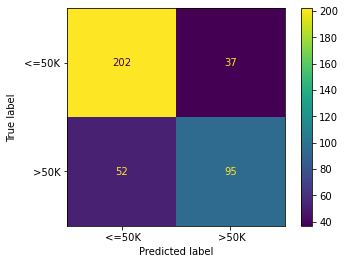

In [49]:
# import sklearn confusion matrix
# import sklearn ConfusionMatrixDisplay
# hasil prediksi data test dengan confusion matrix

conf_mat = confusion_matrix(y_test, y_pred_test, labels=model_logreg.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model_logreg.classes_)

display.plot()
plt.show()

Confusion Matrik menjelaskan data yang terpredict dengan benar benar 201, salah salah 98, dan ada 52 35 atau dengan jumlah 85 data yang kurang tepat.

- Metric Evaluation

In [50]:
# import sklearn.metrics classification_report, roc_auc_score, accuracy_score
# menampilkan metric evaluasi

y_prob_train = model_logreg.predict_proba(X_train_final)[:,1]
y_prob_test = model_logreg.predict_proba(X_test_final)[:,1]

print("="*22,"TRAINING","="*22)
print(classification_report(y_train, y_pred_train, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*24,"TEST","="*24)
print(classification_report(y_test, y_pred_test, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

====================== TRAINING ======================
              precision    recall  f1-score   support

       <=50K       0.77      0.84      0.81       941
        >50K       0.71      0.62      0.66       601

    accuracy                           0.75      1542
   macro avg       0.74      0.73      0.73      1542
weighted avg       0.75      0.75      0.75      1542

ROC-AUC Score Train: 0.8261346215393756


======================== TEST ========================
              precision    recall  f1-score   support

       <=50K       0.80      0.85      0.82       239
        >50K       0.72      0.65      0.68       147

    accuracy                           0.77       386
   macro avg       0.76      0.75      0.75       386
weighted avg       0.77      0.77      0.77       386

ROC-AUC Score Test: 0.8381151623829447


Hasil matric evaluasi dipilih karena data target adalah categorical, didapatkan nilai2 :

perbandingan accuracy Training 0.74 dan test 0.77 cukup, target yang <=50k nilai precision, recal, f1-score lebih baik dari target yg >50k, ini disebabkan karena pesebaran data/karena data imbalance.

untuk ROC AUC score, ini baik dan model just fit dengan value Train 0.82 dan Test 0.83

# Model Inference LogReg

In [51]:
fun_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,29,Self-emp-not-inc,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,>50K
1,41,Private,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,>50K
2,28,Private,9th,5,Married-civ-spouse,Sales,Husband,White,Male,4508,0,40,United-States,<=50K
3,42,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,El-Salvador,>50K
4,44,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,<=50K


In [52]:
# memisahkan fitur numerik dengan fitur kategorikal

data_inf_num = fun_inf[num_columns]
data_inf_cat = fun_inf[cat_columns]

In [53]:
# scaling untuk fitur numerik
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_num_scaled

array([[-1.07570772, -0.17342611, -0.24606861],
       [ 0.59641053, -0.17342611, -0.24606861],
       [-1.41013137,  0.38434866, -0.24606861],
       [ 0.26198688, -0.17342611, -0.24606861],
       [ 0.26198688, -0.17342611, -0.24606861]])

In [54]:
# encoding untuk fitur kategorik

data_inf_cat_enc = encoder.transform(data_inf_cat).toarray()


In [55]:
# menggabungkan fitur numerik yang sudah discale dan fitur kategori yang sudah diencode

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)

In [56]:
# membuat dataframe untuk data_inf_final

data_inf_final_df = pd.DataFrame(data_inf_final)
data_inf_final_df

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-1.075708,-0.173426,-0.246069,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.596411,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-1.410131,0.384349,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.261987,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.261987,-0.173426,-0.246069,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [57]:
# prediksi terhadap data scale

y_pred_inf = model_logreg.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predict Income Bracket (LogReg)'])
y_pred_inf_df

,Predict Income Bracket (LogReg)
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,<=50K


In [58]:
pd.concat([fun_inf, y_pred_inf_df], axis=1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,Predict Income Bracket (LogReg)
0,29,Self-emp-not-inc,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,>50K,<=50K
1,41,Private,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,>50K,>50K
2,28,Private,9th,5,Married-civ-spouse,Sales,Husband,White,Male,4508,0,40,United-States,<=50K,<=50K
3,42,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,El-Salvador,>50K,<=50K
4,44,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,<=50K,<=50K


model memprediksi data inference, ada 4 nilai predict yang tepat menggunakan model logreg

# Support Vector Machine (SVM)

In [59]:
# import svm

model_svm = SVC( C=0.5, kernel='rbf', probability=True)

# Model Training SVM

In [60]:
model_svm.fit(X_train_final, y_train)

SVC(C=0.5, probability=True)

# Model Evaluation SVM

In [61]:
# prediksi nilai pada data train dan test

y_pred_train_svm = model_svm.predict(X_train_final)
y_pred_test_svm = model_svm.predict(X_test_final)

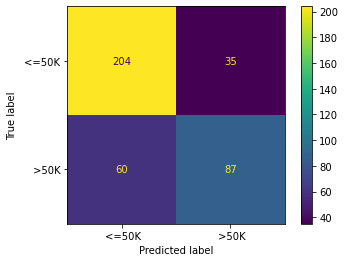

In [62]:
# hasil prediksi data test dengan confusion matrix

conf_mat = confusion_matrix(y_test, y_pred_test_svm, labels=model_svm.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model_svm.classes_)

display.plot()
plt.show()

#### Model Evaluation Metric SVM

In [63]:
# menampilkan metric evaluasi

y_prob_train_svm = model_svm.predict_proba(X_train_final)[:,1]
y_prob_test_svm = model_svm.predict_proba(X_test_final)[:,1]

print("="*22,"TRAINING","="*22)
print(classification_report(y_train, y_pred_train_svm, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train_svm))
print("\n")
print("="*24,"TEST","="*24)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test_svm))

====================== TRAINING ======================
              precision    recall  f1-score   support

       <=50K       0.77      0.88      0.82       941
        >50K       0.75      0.58      0.66       601

    accuracy                           0.76      1542
   macro avg       0.76      0.73      0.74      1542
weighted avg       0.76      0.76      0.76      1542

ROC-AUC Score Train: 0.8280584431544309


======================== TEST ========================
              precision    recall  f1-score   support

       <=50K       0.77      0.85      0.81       239
        >50K       0.71      0.59      0.65       147

    accuracy                           0.75       386
   macro avg       0.74      0.72      0.73       386
weighted avg       0.75      0.75      0.75       386

ROC-AUC Score Test: 0.8122989781686732


Nilai akurasi train dan test 76 dan 75. Nilai ROC-AUC score didapatkan 0.82 dan 0.81. Model SVM sudah cukup baik.

Untuk precision, recal, f1-score secara keseluruhan nilai train lebih besar dibandingkan nilai test, ini berarti model bisa membaca pattern data dengan cukup baik. meskipun tidak secara menyeluruh. catatan perhatikan data set untuk modelling tahap lanjutan

# Model Inference SVM

In [64]:
fun_inf

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,29,Self-emp-not-inc,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,>50K
1,41,Private,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,>50K
2,28,Private,9th,5,Married-civ-spouse,Sales,Husband,White,Male,4508,0,40,United-States,<=50K
3,42,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,El-Salvador,>50K
4,44,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,<=50K


In [65]:
# Inference predict
y_pred_inf_svm = model_svm.predict(data_inf_final)
y_pred_inf_svm_df = pd.DataFrame(y_pred_inf_svm, columns=['Predict Income Bracket (SVM)'])
y_pred_inf_svm_df

,Predict Income Bracket (SVM)
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,<=50K


In [66]:
# Hasil predict diconcat dengan data inference
pd.concat([fun_inf, y_pred_inf_svm_df], axis=1)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket,Predict Income Bracket (SVM)
0,29,Self-emp-not-inc,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,35,United-States,>50K,<=50K
1,41,Private,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,>50K,>50K
2,28,Private,9th,5,Married-civ-spouse,Sales,Husband,White,Male,4508,0,40,United-States,<=50K,<=50K
3,42,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,El-Salvador,>50K,<=50K
4,44,Private,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,<=50K,<=50K


Model dapat mempredict data lebih baik, dari 5 data inference model dapat mempredict 3 nilai benar dan 2 nilai kurang tepat.

# Kesimpulan

Analysis data dan olahdata membuat penulis memilih feature 'education_num', 'capital_gain', 'capital_loss', 'workclass', 'education', 'occupation', 'relationship', 'sex', karena pada kolom ini terdapat korelasi dengan income bracket atau golongan pendapatan.

setelah dianlysa dan dimodelkan penulis mendapatkan hasil-hasil
- untuk model linear regression, hasil yang didapat cukup baik dengan ketentuan nilai score predict nya untuk data inference yaitu hanya dapat memprediksi 2 data yang tepat.
- sedangkan untuk model Support Vector Machine (SVM), nilanya cukup signifikan yaitu dapat mempredict 4 data dengan benar dari 5 data.
- secara keseluruhan nilai signifikansinya tidak jauh berbeda tetapi penulis berpendapat bahwa model logreg  dapat dijadikan model yang dipilih untuk tahapan pengembangan data.
- pada data ini penulis mencoba model dengan data yang imbalace dengan asumsi data balance atau tidak berbedan cukup jauh antar kedua datanya.
- Noted : pada improving model selanjutnya hal-hal yang harus di regulated kembali adalah pertama data pada coloum capital_gain harus dihandle meskipun bukan pada handle outlier tapi nilai yang jauh diatas sebaiknya didrop, kemudian pada data train data sebaiknya di balance kan, dan terakhir model pilihan terbaik yaitu logreg akan diatur Hyperparameter terbaiknya dengan GridSearchCV untuk menemukan best hyperparameternya.

# Conceptual Problems
- yang saya ketahui untuk coeficient pada logreg
- SVM menggunakan vektor sebagai penanda untuk membagi data ke dalam dua kelompok menggunakan 2 titik/vector jadi sesuai namanya SVM ini menggunakan vector, kemudian garis/sisi pembatas yang dibentuk dari dua buah vektor ini disebut dengan hyperplane.
- parameter kernal secara sederhana adalah metode yang dipakai untuk memetakan data non-linear berdimensi rendah dan mengubahnya ke dalam ruang dimensi yang lebih tinggi. Tujuannya untuk memudahkan pengklasifikasian data dengan menemukan hyperplane yang dapat memisahkan dataset secara linear dengan baik.